# <center>Challenge 3<center>

<p>Team Name: Martin-Mire-Crawford
<p>Student Names: Kyle Martin, Allen Mire, Garrett Crawford
<p>Student W#s: W0470161, W0445696, W0682298

## Instructions
Do NOT hard-code a path or a header name unless otherwise said.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [114]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import binned_statistic, chi2_contingency

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.subplot.wspace'] = .5

In [2]:
rng = np.random.RandomState(10242021)
rng.rand(5)

array([0.70868104, 0.02719018, 0.83524932, 0.41872641, 0.08691675])

## Prepare Data

<b>A. Create a data set with 100 feature vectors with the following attributes (features) as such:</b>

a1 is from a normal distribution N(mean=10,var=4)<br>
a2 is from a normal distribution N(mean=10,var=4)<br>
a3 is from a normal distribution N(mean=20,var=4)<br>
a4 is from a normal distribution N(mean=20,var=16)<br>
a5 is eqaul to 2*a2<br>
a6 is from a uniform distribution U(min=4,max=16)<br>
a7 is from a uniform distribution U(min=14,max=26)<br>
a8 is eqaul to 2*a7<br>
a9 is equal to a1 + a noise from a normal distribution N(0,0.25)<br>
a10 is equal to a7 + a noise from a normal distribution N(0,0.25)<br>
a11 is randomly selected from categories of {Y, N}. Categories have the same probability of occurence.<br>
a12 is from a nominal domain with categories of {H, C}. Categories have the same probability of occurence.

In [46]:
df = pd.DataFrame()

df['a1'] = rng.normal(10, math.sqrt(4), 100)
df['a2'] = rng.normal(10, math.sqrt(4), 100)
df['a3'] = rng.normal(20, math.sqrt(4), 100)
df['a4'] = rng.normal(20, math.sqrt(16), 100)
df['a5'] = 2*df['a2']
df['a6'] = rng.uniform(4, 16, 100)
df['a7'] = rng.uniform(14, 26, 100)
df['a8'] = 2*df['a7']
df['a9'] = df['a1'] + rng.normal(0, math.sqrt(0.25), 100)
df['a10'] = df['a7'] + rng.normal(0, math.sqrt(0.25), 100) 
df['a11'] = rng.choice(['Y', 'N'], size = 100, replace = True)
df['a12'] = rng.choice(['H', 'C'], size = 100, replace = True) 

labels = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10']

df

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12
0,8.074318,8.334485,21.305973,25.195397,16.668970,5.877866,24.813591,49.627182,7.920099,24.796890,Y,H
1,11.008153,9.999048,20.380044,18.604884,19.998096,7.255389,25.642320,51.284640,10.900058,25.483180,N,C
2,11.301016,10.008853,19.201575,19.477629,20.017707,5.071922,19.503309,39.006618,11.156929,19.421420,Y,H
3,10.721888,9.369363,21.352492,24.334738,18.738726,12.519337,18.679175,37.358350,10.765692,19.207710,N,H
4,9.753743,11.084034,20.531312,20.992592,22.168069,15.288470,20.110216,40.220431,8.416947,20.465934,Y,C
...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.660533,12.619696,15.999257,23.809526,25.239393,7.687587,21.627906,43.255812,11.874096,21.420576,Y,C
96,8.595211,4.178242,18.599206,22.186819,8.356485,7.441742,15.733693,31.467387,7.861067,16.474664,N,H
97,11.820888,11.400183,19.353355,25.350820,22.800367,7.553169,15.257672,30.515344,11.758216,15.234206,Y,H
98,7.322856,12.884558,18.972753,18.067603,25.769117,7.591976,18.281545,36.563089,7.412743,18.556784,N,C


## Explore Data

Plot Box-Whisker in the same chart

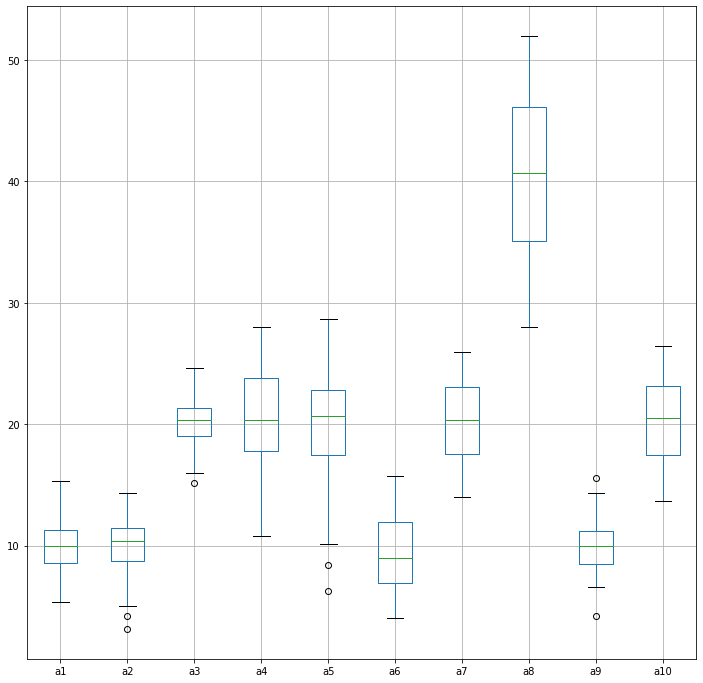

In [47]:
df.boxplot()

Plot histogram of each attribute in the same figure on separate sub-charts. Use equal-width discretization.

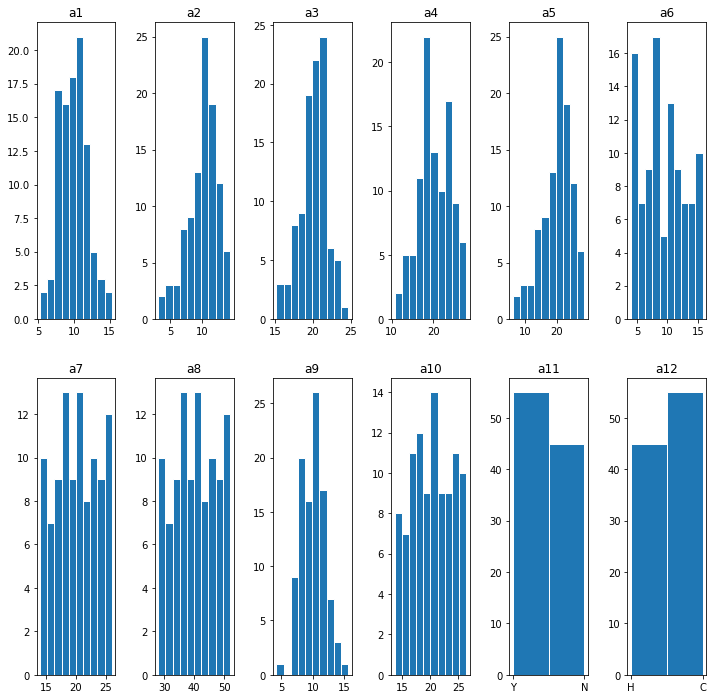

In [80]:
plt.figure()
for i in range(0, 10):
    plt.subplot(2, 6, i+1)
    plt.hist(df[labels[i]], bins=10, edgecolor='white')
    plt.title(f'a{i+1}')
plt.subplot(2, 6, 11)
plt.title('a11')
plt.hist(df['a11'], bins=2, edgecolor='white')
plt.subplot(2, 6, 12)
plt.title('a12')
plt.hist(df['a12'], bins=2, edgecolor='white')
plt.show()

    

## Smoothing

Smooth by bin means

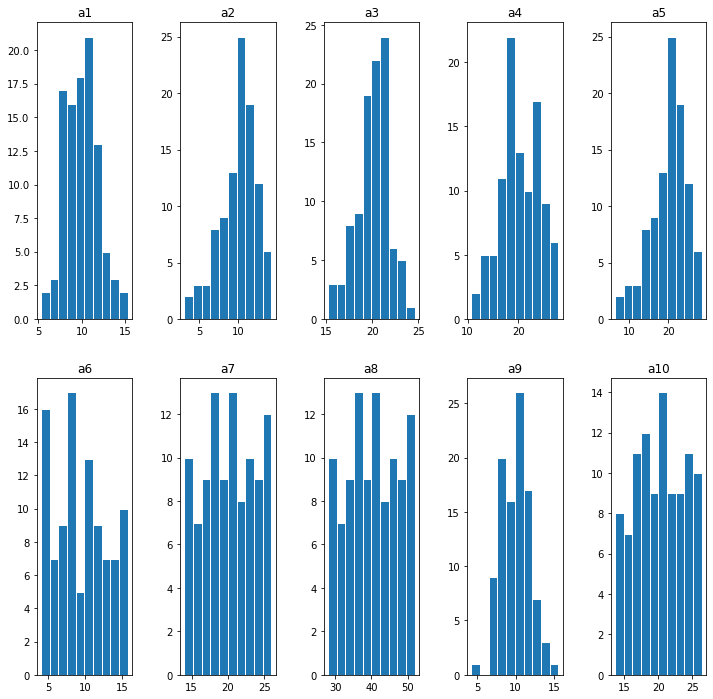

In [149]:
plt.figure()
for i in range(0, 10):
    binmeans, bin_edges, binnumber = binned_statistic(df[labels[i]], df[labels[i]], statistic='mean')
    counts, bins = np.histogram(df[labels[i]], bins=bin_edges)
    plt.subplot(2, 5, i+1)
    plt.hist(bins[:-1], bins=bins, weights=counts, edgecolor='white')
    plt.title(f'a{i+1}')
plt.show()


Smooth by bin median

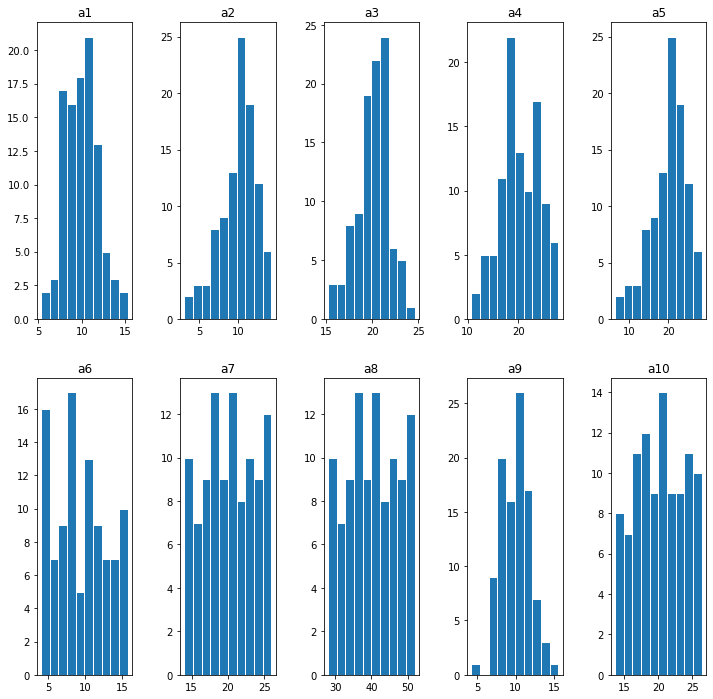

In [150]:
plt.figure()
for i in range(0, 10):
    binmedian, bin_edges, binnumber = binned_statistic(df[labels[i]], df[labels[i]], statistic='median')
    counts, bins = np.histogram(df[labels[i]], bins=bin_edges)
    plt.subplot(2, 5, i+1)
    plt.hist(bins[:-1], bins=bins, weights=counts, edgecolor='white')
    plt.title(f'a{i+1}')
plt.show()

Smooth by the kernel [1 2 6 2 1]. Apply padding with the same value as needed.

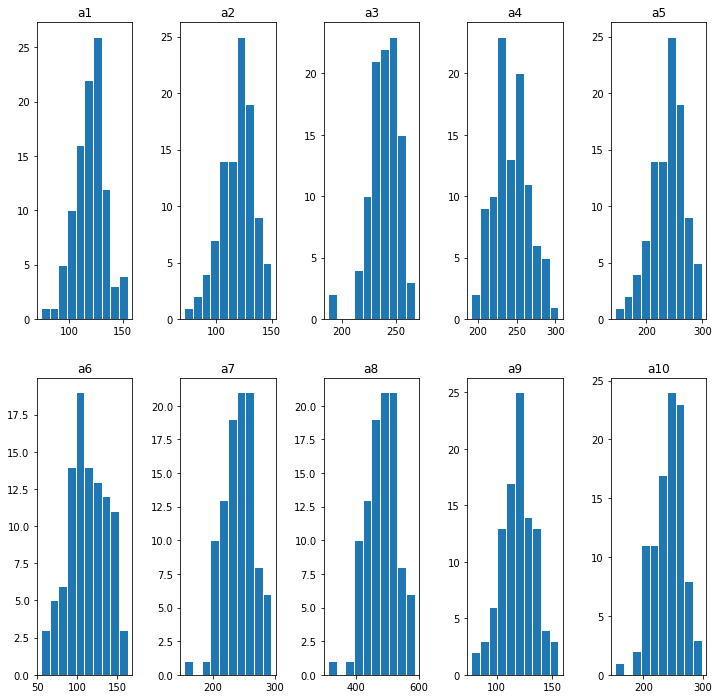

In [97]:
kernel = [1, 2, 6, 2, 1]
plt.figure()
for i in range(0, 10):
    smoothdf = np.convolve(df[labels[i]], kernel, mode='same')
    #counts, bins = np.histogram(smoothdf, bins=10)
    plt.subplot(2, 5, i+1)
    plt.hist(smoothdf, bins=10, edgecolor='white')
    plt.title(f'a{i+1}')
plt.show()

## Analyze Attribute Independency

Generate Correlation-Coefficient Matrix. Discuss how attributes are correlated.

In [49]:
corrcoef = df.corr()
corrcoef

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
a1,1.000000,-0.019148,-0.089815,-0.070263,-0.019148,-0.083876,0.095810,0.095810,0.958841,0.105813
a2,-0.019148,1.000000,-0.027994,0.081933,1.000000,0.176430,-0.001256,-0.001256,-0.016365,0.000803
a3,-0.089815,-0.027994,1.000000,-0.043540,-0.027994,0.079648,0.041636,0.041636,-0.101893,0.063559
a4,-0.070263,0.081933,-0.043540,1.000000,0.081933,0.061493,-0.074261,-0.074261,-0.069635,-0.054327
a5,-0.019148,1.000000,-0.027994,0.081933,1.000000,0.176430,-0.001256,-0.001256,-0.016365,0.000803
a6,-0.083876,0.176430,0.079648,0.061493,0.176430,1.000000,-0.136164,-0.136164,-0.092143,-0.150200
a7,0.095810,-0.001256,0.041636,-0.074261,-0.001256,-0.136164,1.000000,1.000000,0.078536,0.990511
a8,0.095810,-0.001256,0.041636,-0.074261,-0.001256,-0.136164,1.000000,1.000000,0.078536,0.990511
a9,0.958841,-0.016365,-0.101893,-0.069635,-0.016365,-0.092143,0.078536,0.078536,1.000000,0.084201
a10,0.105813,0.000803,0.063559,-0.054327,0.000803,-0.150200,0.990511,0.990511,0.084201,1.000000


A2 and A5 have 100% correlation, which makes sense since A5 is just the same data as A2 multiplied by 2. The same goes for A7 and A8. 

A1 and A9 also have a high correlation-coefficient because A1 is just A9 with some noise added to it. The same goes for A7 and A10.

The rest of the coefficients are near zero, which indicates no real correlation.

Generate Chi-square Matrix. Discuss how attributes are correlated.

In [108]:
ua11, fa11 =  np.unique(df['a11'], return_counts=True)
ua12, fa12 = np.unique(df['a12'], return_counts=True)
freq_mat = np.vstack((fa11,fa12))
print(freq_mat)

chi2_contingency(freq_mat)

[45 55] [55 45]
[[45 55]
 [55 45]]


(1.62, 0.20309178757716426, 1, array([[50., 50.],
        [50., 50.]]))

The first value returned from chi2_contingency represents our test-statistic chi-squared, which is 1.62. After consulting a Chi-Square Table from Introduction to Probability and Statistics by Milton and Arnold (my MATH 380/480 textbook). The test value we are testing is 6.63.

6.63 > 1.62 so we cannot reject the null Hypothesis that our data sets are independent.

Generate Scatter-Plot Matrix. Discuss how attributes are correlated.

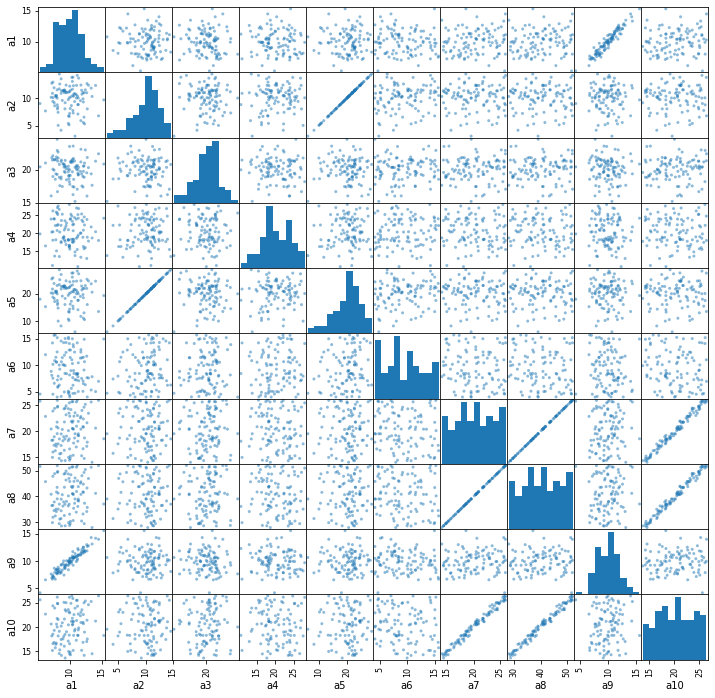

In [53]:
sm = pd.plotting.scatter_matrix(df)

The scatter plots just graphically demonstrate what we already knew from the table of correlation coefficients. 

A2 and A5 have 100% correlation, which makes sense since A5 is just the same data as A2 multiplied by 2. The same goes for A7 and A8. Therefore their scatter plots show very clean tightly clustered lines.

A1 and A9 also have a high correlation-coefficient because A1 is just A9 with some noise added to it. The same goes for A7 and A10. Therefore their scatter plots show clearly contain lines, but they are not as tightly clustered as the previous pairs. That is easily explained by the fact that the noise that was added to A1 and A7 to create A9 and A10 was randomly generated and has variance as opposed to A5 and A8 being created via scalar multiplication. 

The rest of the coefficients are near zero, which indicates no real correlation so their scatter plots are just clouds of data.

## Data Reduction

Apply PCA. Discuss outcome of PCA analysis and how you can use outcome of PCA analysis for data reduction.

<class 'numpy.ndarray'>
100
(100, 10)
(10, 100)


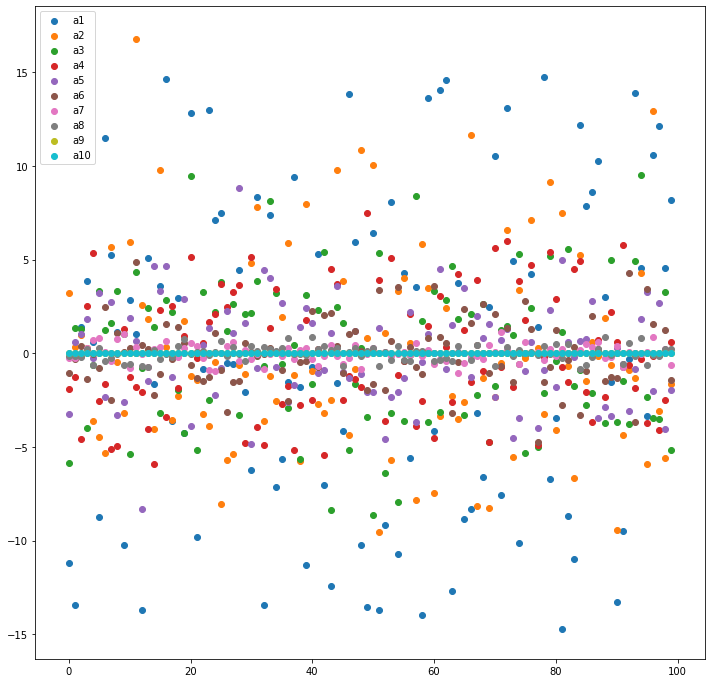

In [148]:
pca = PCA()

X_r = pca.fit(df[labels]).transform(df[labels])

print(type(X_r))
print(len(X_r))
print(np.shape(X_r))
T_xr = X_r.transpose()
print(np.shape(T_xr))

for i in range(0, 10):
    plt.scatter(range(0,100), T_xr[i])
plt.legend(loc='best', labels=labels)
plt.show()

Doing PCA on the data set and then plotting the transformed data allows us to see what components of the data set can be safely ignored during the data mining process, due to low variance. As you can see from the plot, A9 and A10 have almost no variance (because they are created from A1 and A7) so those points all lay almost exactly on the x-axis. A5 and A8 were also both created from other data sets (A2 and A7 respectively) so their points are still clustered around 0 but not to the degree as A9 and A10. The uniform distributions A7 and A8 are also low variance.

The use of PCA is for the purposes of data reduction. Huge datasets can be expensive to run computations on so using PCA to help us eliminate data features that are not very useful to the knowledge discovery process, which can accelerate the whole process.

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

Numpy Documentation: https://numpy.org/doc/stable/reference/index.html

Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Matplotlib Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

Scipy Documentation: https://docs.scipy.org/doc/scipy/reference/stats.html?highlight=scipy%20stats#module-scipy.stats

Sklearn Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


Introduction to Probability and Statistics (Fourth Edition) by J. Susan Milton and Jesse C. Arnold